## Assignment 11 Decision Tree. Supervised ML. Question 01. 
### Dataset :-  Fraud_check


### Quick info.about Decision Tree algorithm / Classifier
#### Info :- 
Decision Tree is one of the easiest and popular classification algorithms to understand and interpret. 
It can be utilized for both classification and regression kind of problem.
like tree structure.
internal node represents attribute.
branch represents a decision rule, and each leaf node represents the outcome.
topmost node in a decision tree is known as the root node. 
It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive 
partitioning.
Decision Tree is a white box type of ML algorithm.
It shares internal decision making logic, which is not available in the black box type of algorithms such as Neural    Network.
Its training time is faster compared to the neural network algorithm.
The time complexity of decision trees is a function of the number of records and number of attributes in the given data. 
The decision tree is a distribution free or non parametric method, which does not depend upon probability distribution assumptions. 
Decision trees can handle high dimensional data with good accuracy.

#### Advantages 
1) Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.
2) A decision tree does not require normalization of data.
3) A decision tree does not require scaling of data as well.
4) Missing values in the data also do NOT affect the process of building a decision tree to any considerable extent.
5) A Decision tree model is very intuitive and easy to explain to technical teams as well as stakeholders.

#### Disadvantage
1) A small change in the data can cause a large change in the structure of the decision tree causing instability.
2) For a Decision tree sometimes calculation can go far more complex compared to other algorithms.
3) Decision tree often involves higher time to train the model.
4) Decision tree training is relatively expensive as the complexity and time has taken are more.
5) The Decision Tree algorithm is inadequate for applying regression and predicting continuous values.



In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

### Loading Dataset

In [88]:
Fraud_check = pd.read_csv("D:\Data Science Material\Assignments\Decision tree\Fraud_check.csv")

In [89]:
Fraud_check.head(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES


In [90]:
Fraud_check.tail(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [91]:
Fraud_check.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [92]:
Fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [117]:
# making original data safe and its copy is in use
Fraud_check01 = Fraud_check.copy()

In [94]:
Fraud_check01.head(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES


### Data Analysis

In [95]:
# finding NA values
Fraud_check01.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

Zero NA values found

In [96]:
Fraud_check01.Undergrad.value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [97]:
Fraud_check01['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [98]:
Fraud_check01.Urban.value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [99]:
Fraud_check01.shape

(600, 6)

### Data Wrangling / Cleaning

In [100]:
Fraud_check01.head(1)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES


In [101]:
# renaming cols

#Fraud_check01 = Fraud_check01.rename({'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'},axis=1)

#### Outlier

In [120]:
def count_plot(df, columns):
    plt.figure(figsize=(8,5))
    for i,var  in enumerate(columns):
        plt.subplot(1,2,1)
        g = sns.countplot(df[var])
    plt.tight_layout()
    
features = Fraud_check01.columns.tolist()
features.remove('Taxable.Income')
features

['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-p

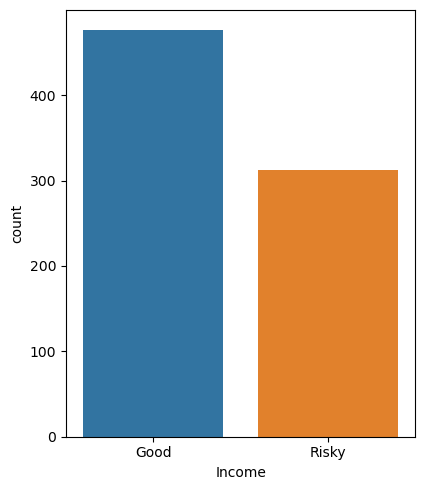

In [108]:
count_plot(Fraud_check01, features)
plt.show()

In [121]:
# OrdinalEncoder - The input to this transformer should be an array-like of integers or strings, 
# denoting the values taken on by categorical (discrete) features. 
# The features are converted to ordinal integers. 
# This results in a single column of integers (0 to n_categories - 1) per feature.

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(Fraud_check01[features])
Fraud_check01_encoded = pd.DataFrame(data_encoded,columns = features)

data_encoded

array([[  0.,   2.,  84.,  10.,   1.],
       [  1.,   0., 398.,  18.,   1.],
       [  0.,   1., 481.,  30.,   1.],
       ...,
       [  0.,   0., 459.,   0.,   1.],
       [  1.,   1., 533.,  17.,   0.],
       [  0.,   0., 477.,  16.,   0.]])

In [122]:
Fraud_check01_encoded.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,2.0,84.0,10.0,1.0
1,1.0,0.0,398.0,18.0,1.0
2,0.0,1.0,481.0,30.0,1.0
3,1.0,2.0,574.0,15.0,1.0
4,0.0,1.0,4.0,28.0,0.0


In [123]:
# making data in to categotical form 

Fraud_check01.loc[Fraud_check01["Taxable.Income"]>=30000,"Income"]="Good"
Fraud_check01.loc[Fraud_check01["Taxable.Income"]<=30000,"Income"]="Risky"

In [131]:
Fraud_check01.head(1)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income
0,NO,Single,68833,50047,10,YES,Good


In [132]:
#LebelEncoder - Encode target labels with value between 0 and n_classes-1. 
# This transformer should be used to encode target values, i.e. y, and not the input X.

encoder = LabelEncoder()
target_encoded = encoder.fit_transform(Fraud_check01['Income'])
Fraud_check01_encoded['Income'] = target_encoded
encoder.inverse_transform(target_encoded)

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [133]:
Fraud_check01_encoded.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Income
0,0.0,2.0,84.0,10.0,1.0,0
1,1.0,0.0,398.0,18.0,1.0,0
2,0.0,1.0,481.0,30.0,1.0,0
3,1.0,2.0,574.0,15.0,1.0,0
4,0.0,1.0,4.0,28.0,0.0,0


In [199]:
Fraud_check01_encoded.shape

(600, 6)

In [ ]:
# making dummies of categorical data and converting it into numeric data
#undergrad = pd.get_dummies(Fraud_check01['Undergrad'],drop_first=True)

In [ ]:
# making dummies of categorical data and converting it into numeric data
#marital_Status = pd.get_dummies(Fraud_check01['Marital_Status'],drop_first=True)

In [ ]:
# making dummies of categorical data and converting it into numeric data
#urban = pd.get_dummies(Fraud_check01['Urban'],drop_first=True)

In [ ]:
# here concatinating all dummie values into given datset
#Fraud_check01 = pd.concat([Fraud_check01,undergrad,marital_Status,urban],axis = 1)

In [ ]:
# droping unwanted cols now 
#Fraud_check01.drop(['Undergrad','Marital_Status','Urban'],inplace = True, axis=1)

In [135]:
Fraud_check01.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
Income             0
dtype: int64

### Visualization

#### Matplotlib

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns 

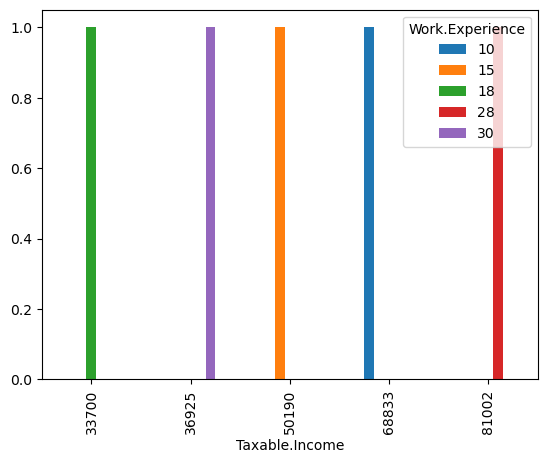

In [140]:
# barplot betn two diff. category
pd.crosstab(Fraud_check01['Taxable.Income'].head(5),Fraud_check01['Work.Experience'].head(5)).plot(kind='bar')
plt.show()

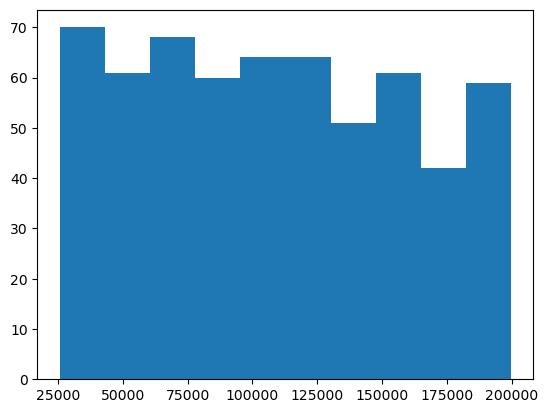

In [141]:
# histogram
plt.hist(Fraud_check01['City.Population'])
plt.show()

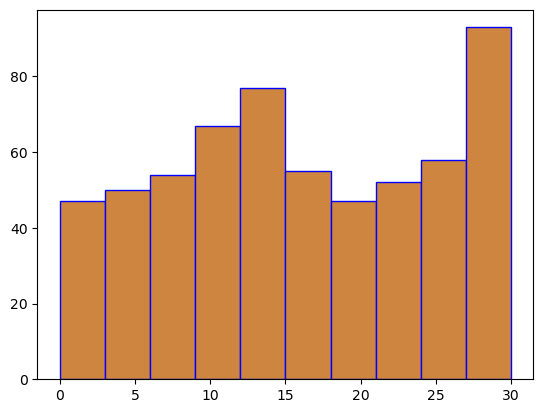

In [142]:
# histogram
plt.hist(Fraud_check01['Work.Experience'],facecolor ="peru",edgecolor ="blue")
plt.show()

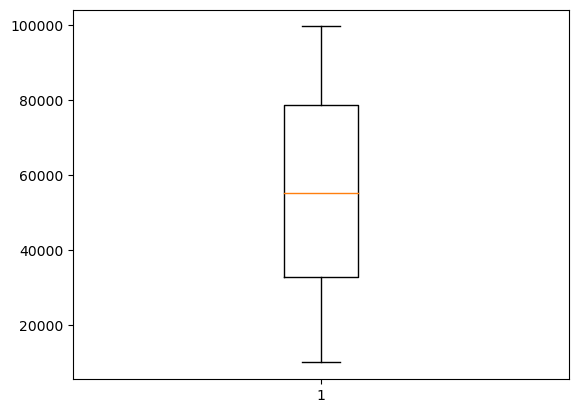

In [143]:
# boxplot
plt.boxplot(Fraud_check01['Taxable.Income'],vert = True)
plt.show()

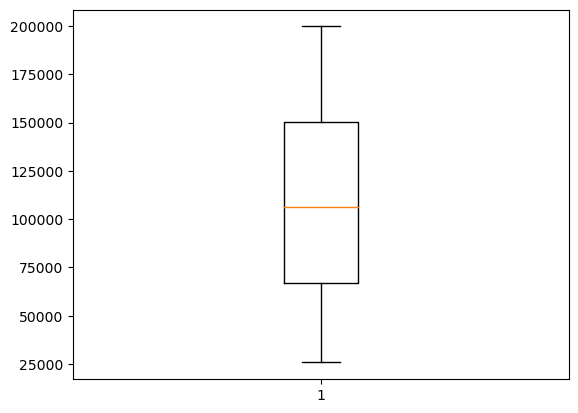

In [144]:
# boxplot
plt.boxplot(Fraud_check01['City.Population'],vert = True)
plt.show()

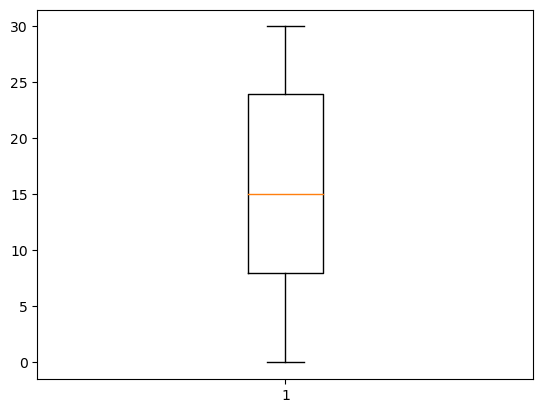

In [145]:
# boxplot
plt.boxplot(Fraud_check01['Work.Experience'],vert = True)
plt.show()

There is no any outlier in the given data as shown in figure \ boxplot

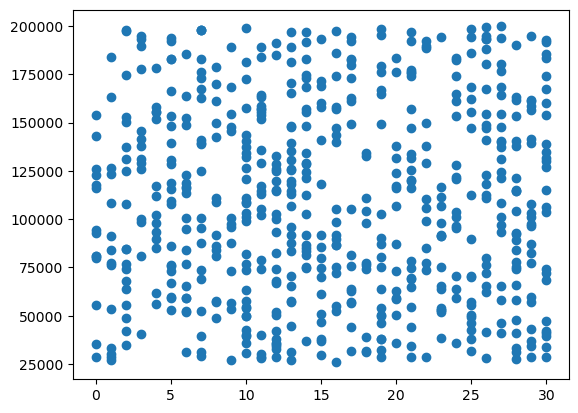

In [146]:
plt.scatter(Fraud_check01['Work.Experience'],Fraud_check01['City.Population'])
plt.show()

In [147]:
Fraud_check01.head(1)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income
0,NO,Single,68833,50047,10,YES,Good


### Seaborn Libraries

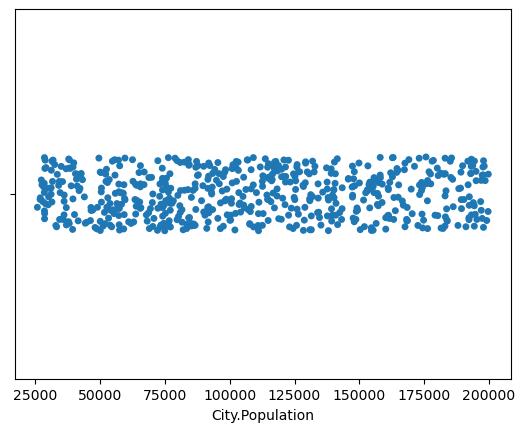

In [148]:
sns.stripplot(x='City.Population',data=Fraud_check01,jitter=True)
plt.show()

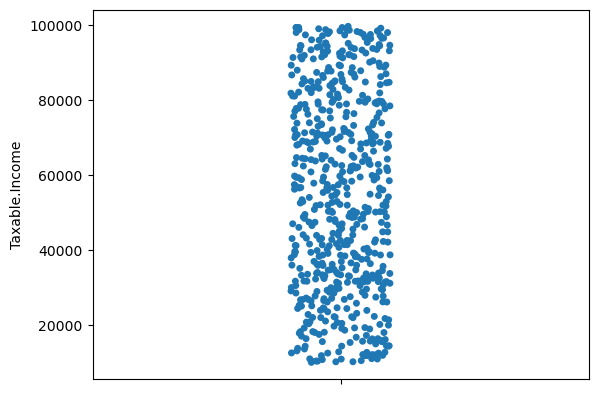

In [149]:
sns.stripplot(y='Taxable.Income',data=Fraud_check01,jitter=True)
plt.show()

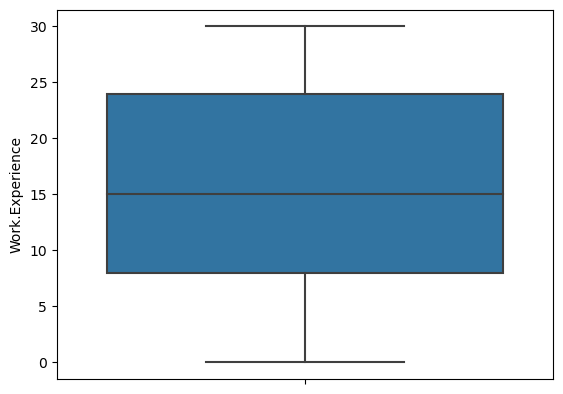

In [150]:
sns.boxplot(y='Work.Experience',data=Fraud_check01)
plt.show()

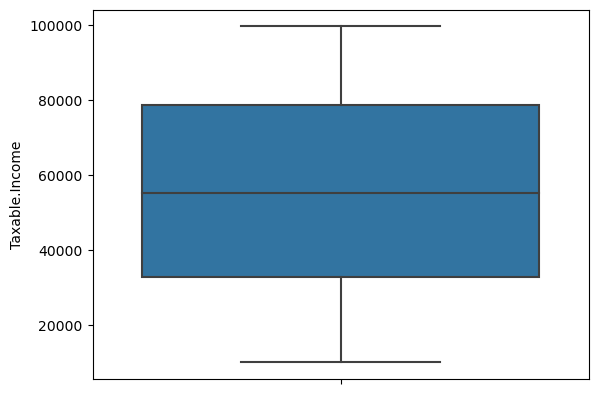

In [151]:
sns.boxplot(y='Taxable.Income',data=Fraud_check01)
plt.show()

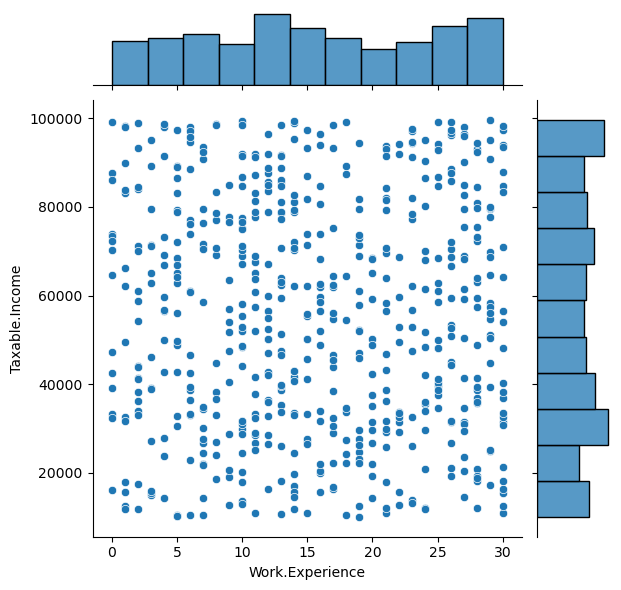

In [152]:
sns.jointplot(x='Work.Experience',y='Taxable.Income',data=Fraud_check01)
plt.show()

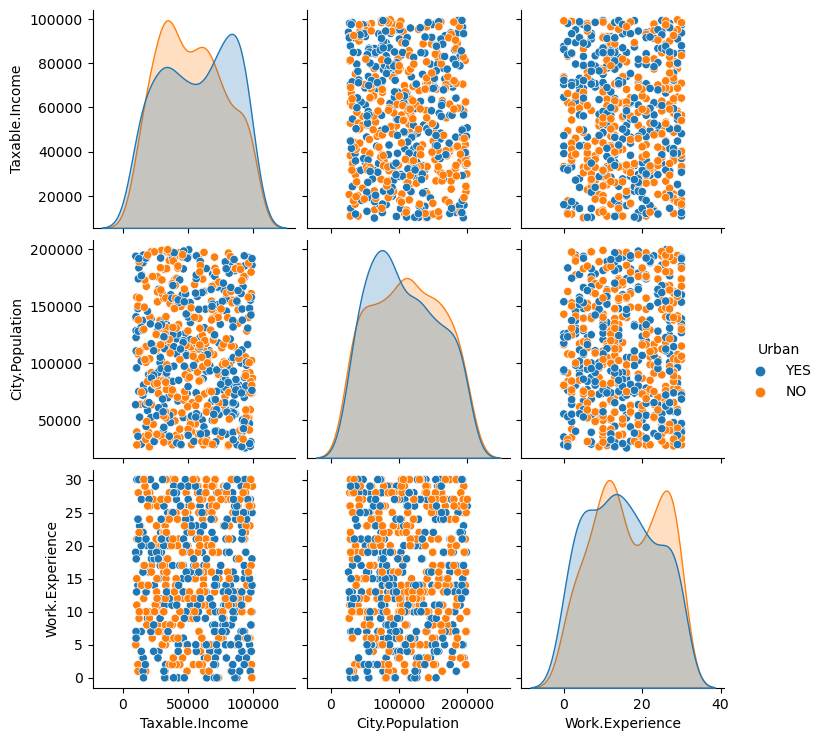

In [153]:
# pairplot   # shows that how data is distributed actuly
sns.pairplot(Fraud_check,hue='Urban')
plt.show()

### Feature Selection

In [ ]:
# Required libraries for building model
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [154]:
Fraud_check01_encoded.head(1)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Income
0,0.0,2.0,84.0,10.0,1.0,0


In [155]:
# capital X is denoted as metrics  # small y denoted as vectore

X = Fraud_check01_encoded.iloc[:,:-1]
y = Fraud_check01_encoded['Income']


#x=iris.iloc[:,0:4]
#y=iris['Species']

#X = Fraud_check01[['Undergrad','Marital_Status','City.Population','Work_Experience','Urban']]
#y = Fraud_check01[['Income']]



In [157]:
X.head(2)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,2.0,84.0,10.0,1.0
1,1.0,0.0,398.0,18.0,1.0


In [158]:
y.head(2)

0    0
1    0
Name: Income, dtype: int32

In [160]:
# seperate out the dataset into train test split

# using this train and test we prevent the over fitting part of dataseet
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)
# showing shape of data actual dividation happened or not ?
print("shape of x_train",X_train.shape)
print("shape of x_test",X_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of x_train (420, 5)
shape of x_test (180, 5)
shape of y_train (420,)
shape of y_test (180,)


In [161]:
X_train.corr()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.033353,0.089697,0.031723,-0.057153
Marital.Status,0.033353,1.000000,0.027385,-0.005067,0.028701
City.Population,0.089697,0.027385,1.000000,0.002756,-0.064580
Work.Experience,0.031723,-0.005067,0.002756,1.000000,-0.075808
Urban,-0.057153,0.028701,-0.064580,-0.075808,1.000000


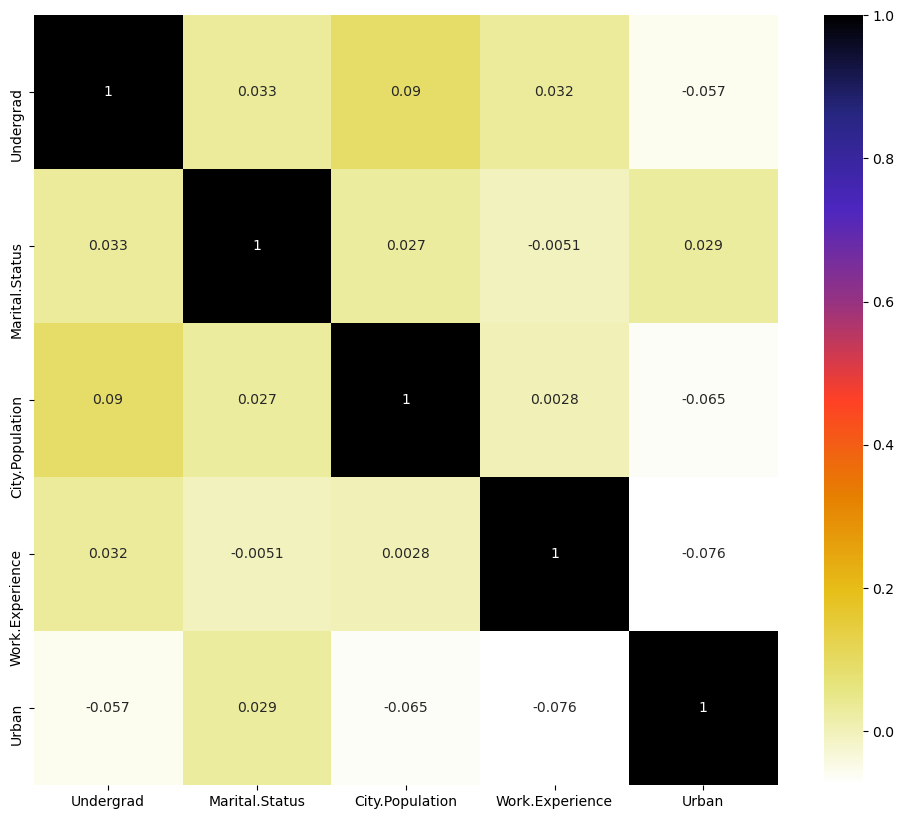

In [162]:

# using pearson corrilation,we doing corrilation on X_training dataset  only 
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [163]:
# with the following feature we can select highly correlated feature 
# it wll remove the first feature that is if it is highly correlated with anything other feature

def correlation(dataset,threshold):
    col_corr = set()  # set of all the names of correlated cols 
    corr_metrix = dataset.corr()
    for i in range(len(corr_metrix.columns)):
        for j in range(i):
            if (corr_metrix.iloc[i,j]) > threshold: # we r interesting in absolute coeff.values
                colnames = corr_metrix.columns[i]  # getting the names of cols
                col_corr.add(colnames)
    return col_corr

In [164]:
corr_features = correlation(X_train,0.7)
len(set(corr_features))

0

In [165]:
corr_features

set()

In [166]:
Fraud_check01.head(1)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income
0,NO,Single,68833,50047,10,YES,Good


In [167]:
# training the decision tree model
from sklearn.tree import DecisionTreeClassifier     # main classifier (applied algoritham )

### Gini method

In [168]:
classifier01 = DecisionTreeClassifier(criterion = 'gini',max_depth=3)

In [169]:
classifier01.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [170]:
classifier01.score(X_test,y_test)

0.7722222222222223

Only gini method gives good accuracy

### Entropy Method

In [171]:
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [172]:
classifier.score(X_test,y_test)  # finding score on x y testing score method

0.6277777777777778

Not soo good accuracy as compare to gini method

In [184]:
#Predicting on test data
preds = classifier.predict(X_test) # predicting on test data set 
#pd.Series(preds).value_counts() # getting the count of each category 

In [187]:
preds

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0])

In [ ]:
# pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

In [ ]:
# Accuracy 
#np.mean(preds==y_test)

### Feature scaling using standard scaler 

In [174]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [175]:
sc.fit_transform(X_train,y_train)  # fitting model on x train

array([[ 0.98113038,  1.14802316,  1.61070554, -0.06043462,  1.        ],
       [-1.01923253,  1.14802316, -1.29180253,  1.05283463, -1.        ],
       [ 0.98113038, -1.26282547,  0.11529571, -0.17176154, -1.        ],
       ...,
       [ 0.98113038,  1.14802316,  0.52741653, -1.39635771,  1.        ],
       [ 0.98113038, -1.26282547, -1.76279775, -0.72839616, -1.        ],
       [ 0.98113038, -1.26282547,  1.15737264,  0.38487308,  1.        ]])

In [176]:
classifier_sc = DecisionTreeClassifier()  # decision tree classifier with gini method 
classifier_sc.fit(X_train,y_train)     # using decision tree classifier we fitting the model on x y train   

DecisionTreeClassifier()

In [177]:
classifier_sc.score(X_test,y_test)     # checking score using .score method on x y test

0.6944444444444444

Not soo good accuracy as compare to gini method

In [198]:
# classifier.predict(Fraud_check01_encoded['Income'] == 30000) # high prediction for seles